In [1]:
function HeadsBias(prob,N)
    heads = zeros(Bool,N)
    i = 1
    while i <= N
        if rand() < prob
            heads[i] = true
        end
        i += 1
    end
    heads
end

HeadsBias (generic function with 1 method)

In [2]:
function ProbH(H)
    prob_h = zeros(size(H,1))
    for i = 1:size(H,1)
        if H[i] >= 0 && H[i] <= 1
            prob_h[i] = 1
        end
    end
    
    prob_h
end

ProbH (generic function with 1 method)

In [3]:
function ProbHAlt1(H)
    v = Normal(0.5, 0.05)
    prob_h_alt1 =  pdf(v,H)/maximum(pdf(v,H))
    prob_h_alt1
end

ProbHAlt1 (generic function with 1 method)

In [4]:
function ProbHAlt2(H)
    v = Beta(0.5,0.5) #Beta(0.3, 0.3)
    prob_h_alt2 =  pdf(v,H)
    prob_h_alt2[1]= 3
    prob_h_alt2[end]= 3
    prob_h_alt2 = prob_h_alt2/maximum(prob_h_alt2)
    prob_h_alt2
end

ProbHAlt2 (generic function with 1 method)

In [5]:
using PyPlot
using Distributions

INFO: Loading help data...


In [6]:
function PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
    n = size(H,1)
    post = zeros(n)
    post_alt1 = zeros(n)
    post_alt2 = zeros(n)
    #prob_h = prob_h/maximum(prob_h_alt1)
    #prob_h_alt1 = prob_h_alt1/maximum(prob_h_alt1)
    #prob_h_alt2 = prob_h_alt2/maximum(prob_h_alt2 )
    R = sum(data[1:N])
    for i = 1:n
        post[i] = BigFloat(10)^R*(BigFloat(H[i]) ^ (R)) * (BigFloat((1 - H[i]))^((N - R))) * prob_h[i]
        post_alt1[i] = BigFloat(10)^R*(BigFloat(H[i]) ^ (R)) * (BigFloat((1 - H[i]))^((N - R))) * prob_h_alt1[i]
        post_alt2[i] = BigFloat(10)^R*(BigFloat(H[i]) ^ (R)) * (BigFloat((1 - H[i]))^((N - R))) * prob_h_alt2[i]
    end
    post,post_alt1,post_alt2
end

PostCalc (generic function with 1 method)

In [7]:
N = 4096
data = HeadsBias(0.25,N)

4096-element Array{Bool,1}:
 false
 false
 false
  true
  true
 false
 false
 false
 false
  true
 false
 false
 false
     ⋮
  true
  true
 false
 false
  true
  true
  true
 false
 false
 false
  true
  true

In [8]:
data[1] = true
data[2] = true
data[3] = false
data[4] = false

false

In [9]:
H = [0:0.001:1]
prob_h = ProbH(H) 
prob_h_alt1 = ProbHAlt1(H) 
prob_h_alt2 = ProbHAlt2(H)

1001-element Array{Float64,1}:
 0.297889
 1.0     
 0.707461
 0.577929
 0.500752
 0.448112
 0.409274
 0.379105
 0.354799
 0.334676
 0.317662
 0.303032
 0.290278
 ⋮       
 0.303032
 0.317662
 0.334676
 0.354799
 0.379105
 0.409274
 0.448112
 0.500752
 0.577929
 0.707461
 1.0     
 0.297889

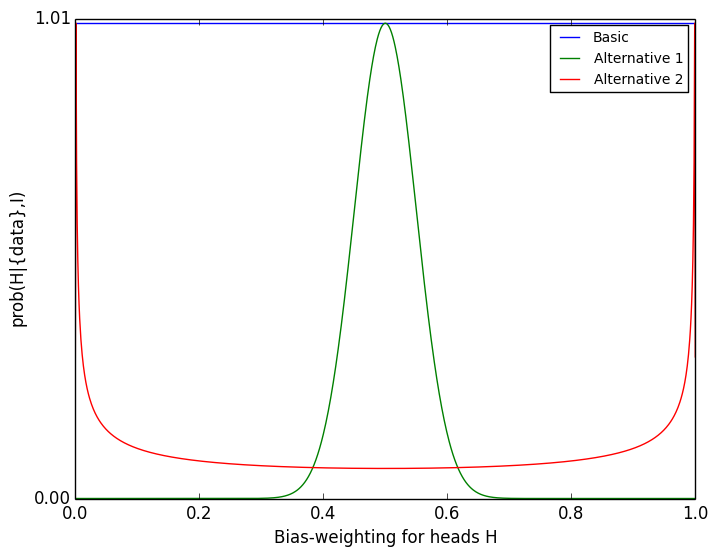

In [26]:
N = 0 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2) 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([0,1.01]) 
ylabel("prob(H|{data},I)")

ax[:legend](("Basic", "Alternative 1", "Alternative 2"), prop=["size" => "small"], loc=1)
fig[:canvas][:draw]() 
#savefig("0.eps")

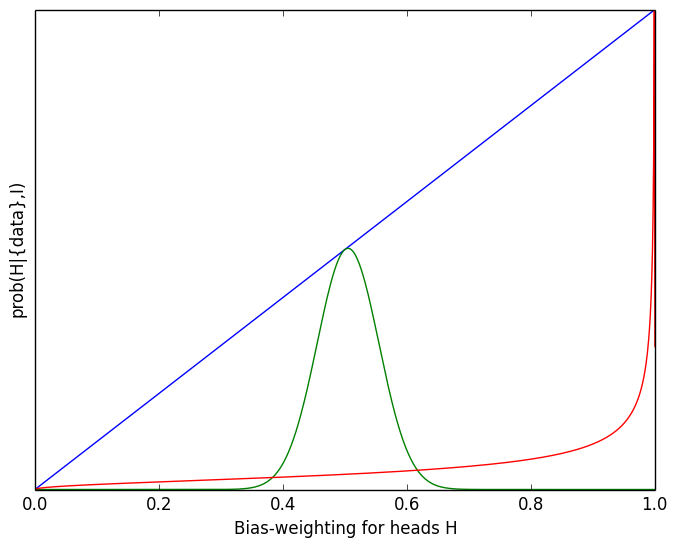

In [11]:
N = 1 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1) 
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 

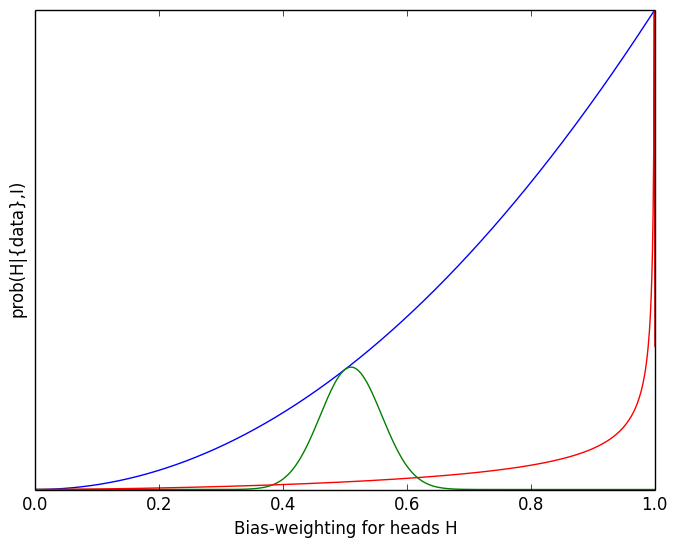

In [12]:
N = 2 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 

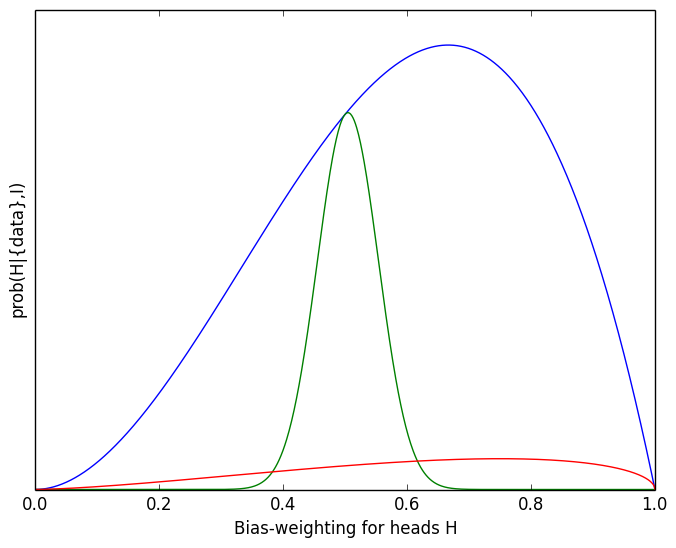

In [13]:
N = 3 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 

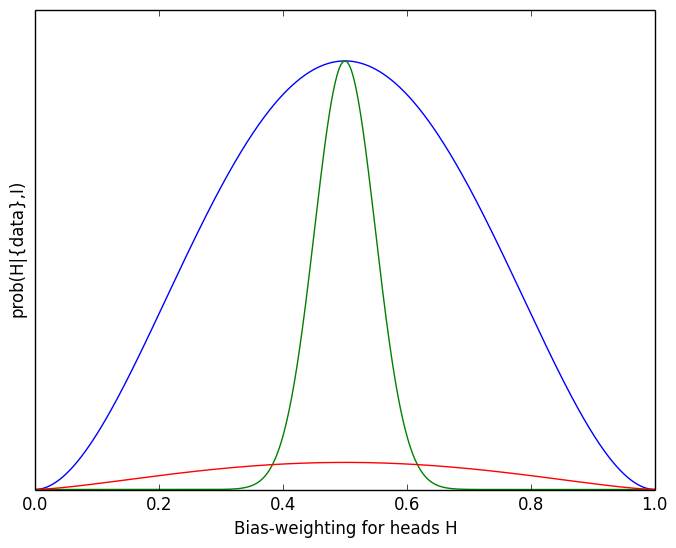

In [14]:
N = 4 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 

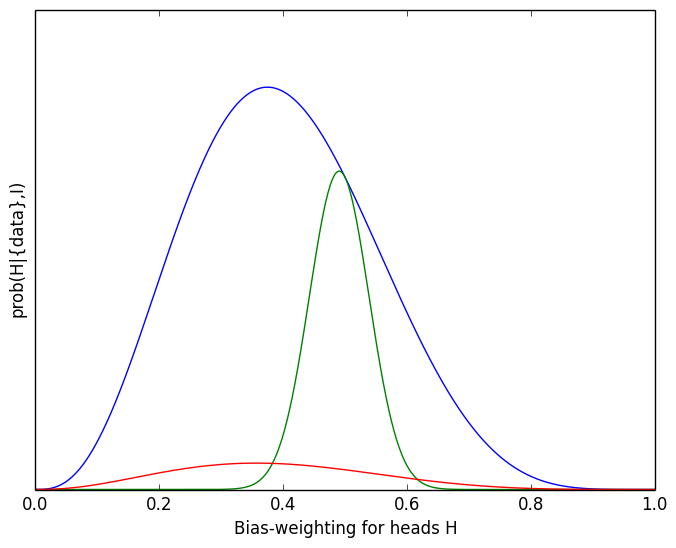

In [15]:
N = 8 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 

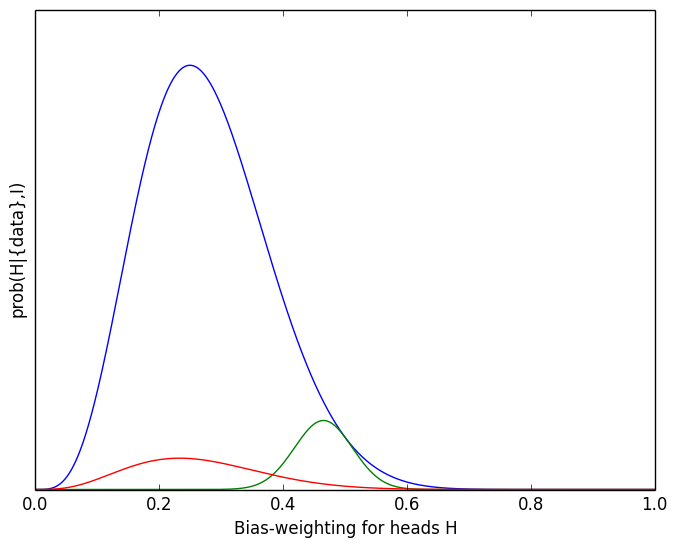

In [16]:
N = 16 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 

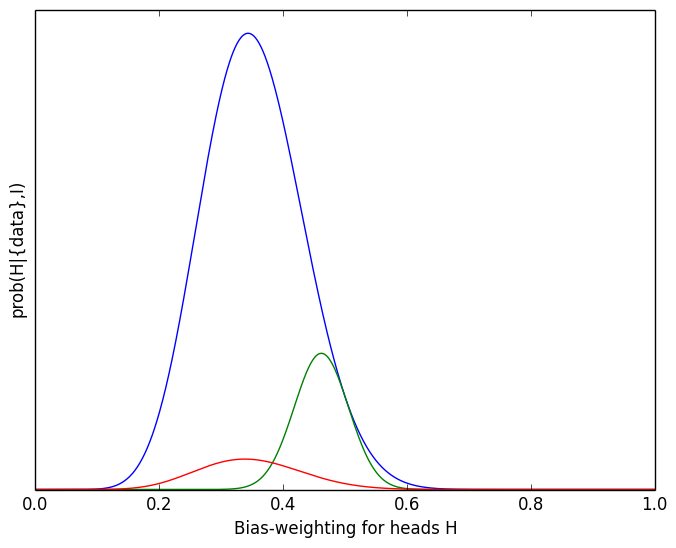

In [17]:
N = 32 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 

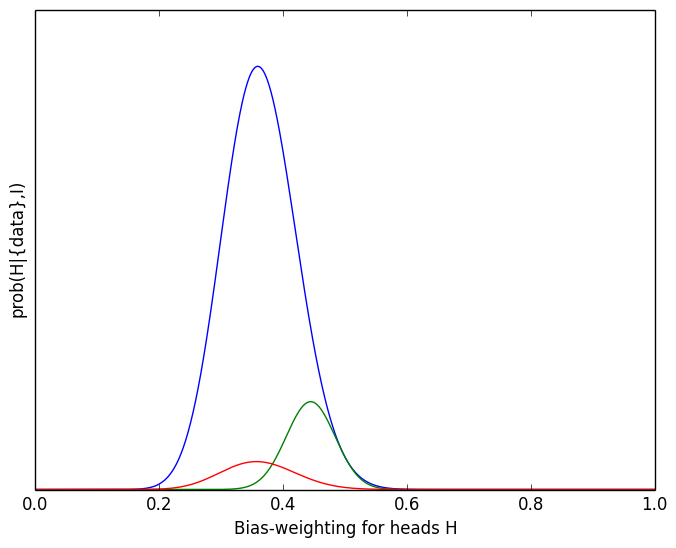

In [18]:
N = 64 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 

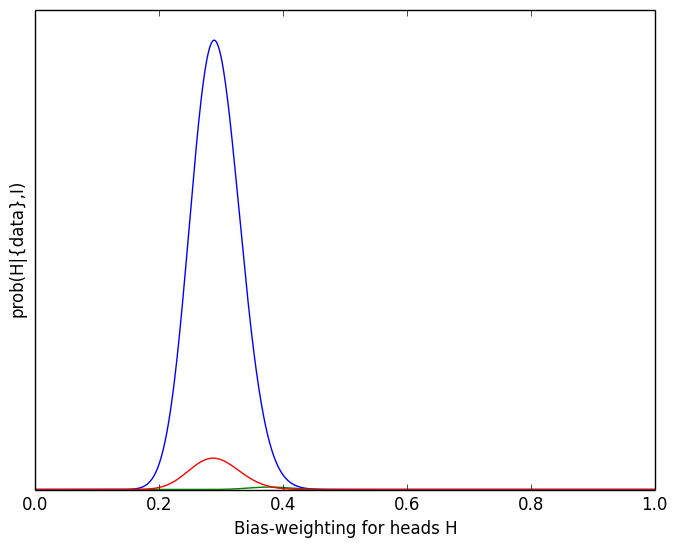

In [19]:
N = 128 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 

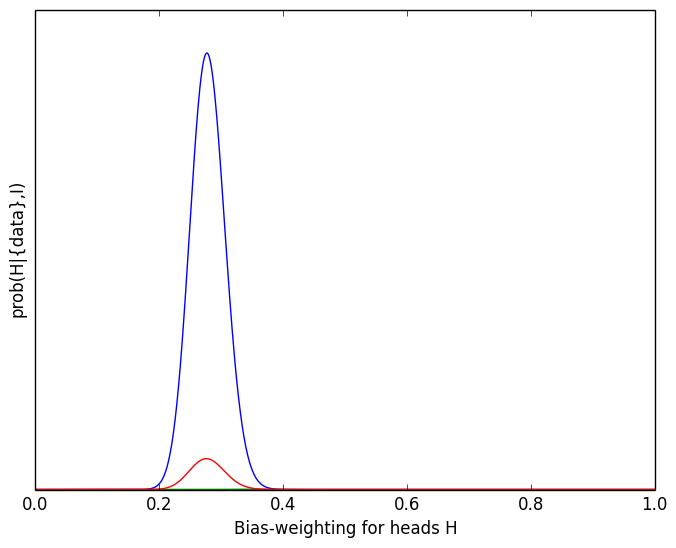

In [20]:
N = 256 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 

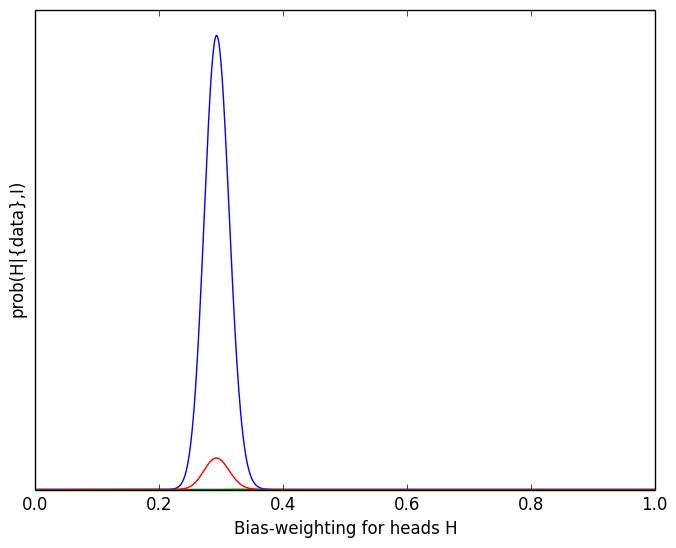

In [21]:
N = 512 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 

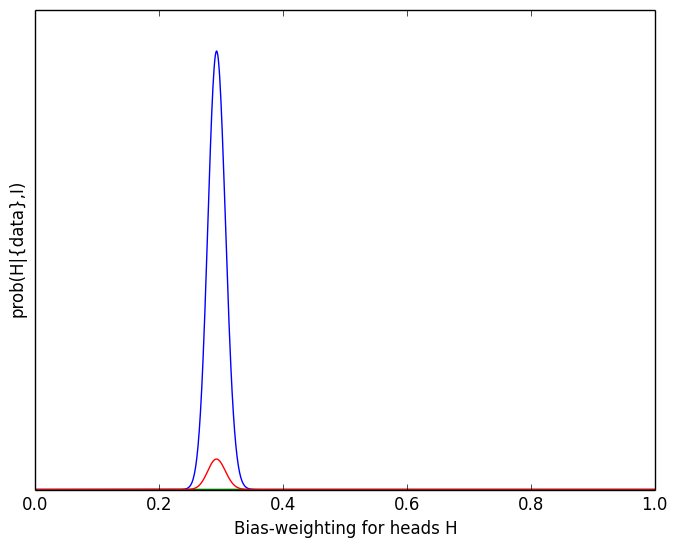

In [22]:
N = 1024 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 

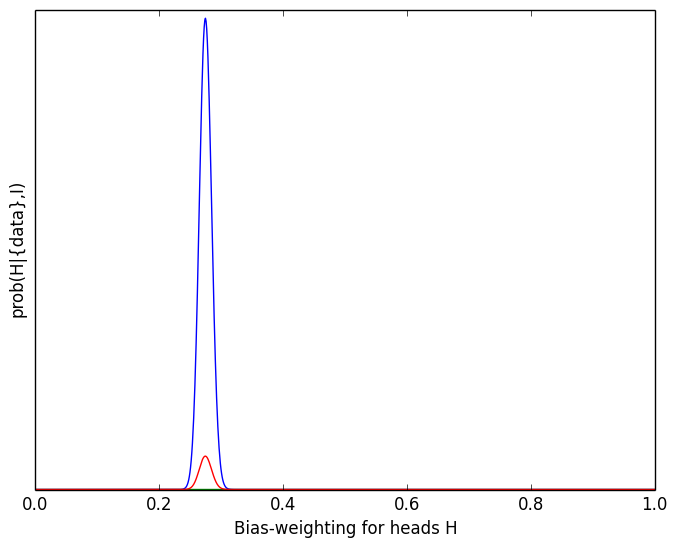

In [23]:
N = 2048 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 

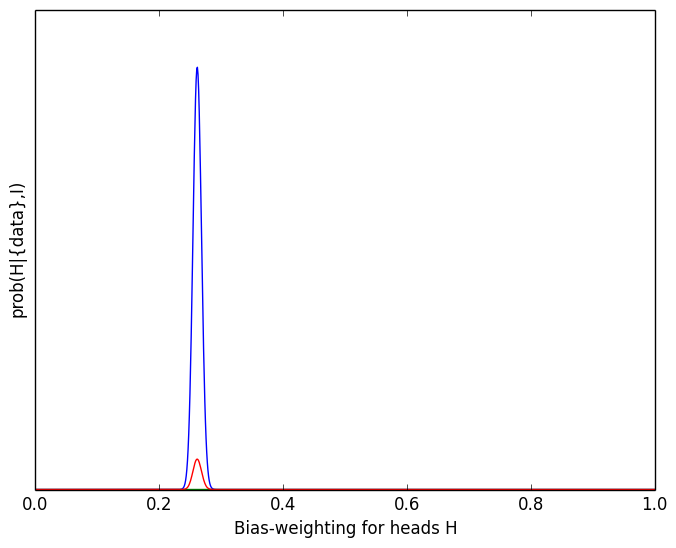

In [24]:
N = 4096 
post,post_alt1,post_alt2 = PostCalc(data,N,prob_h,prob_h_alt1,prob_h_alt2,H)
fig = figure()
p = plot(H,post,H,post_alt1,H,post_alt2,linestyle="-",marker="None",label="Data points = 1024") 
#p = plot(H,post,H,post_alt1)
ax = gca()

xlabel("Bias-weighting for heads H")
ax[:set_yticks]([]) 
ylabel("prob(H|{data},I)")

fig[:canvas][:draw]() 